In [1]:
import os

import numpy as np
import h5py as h5

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.colors import LogNorm
import ion_plot_definitions as ipd

import plotting_tools as pt 

import seaborn as sns
sns.set_style("ticks",{'axes.grid': True, "ytick.major.size": 0.1,
                "ytick.minor.size": 0.05,
                'grid.linestyle': '--'
            })

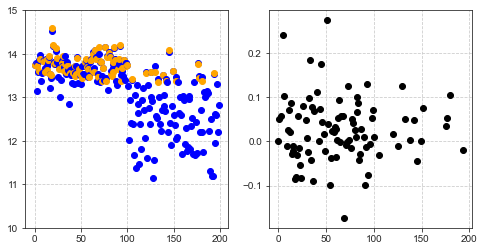

In [13]:
# comparing derived column densities against simulated
ion_list, logN_list, logNerr_list, b_list, berr_list, zcen_list, \
                zcen_sd_list, ray_id_list, model_list, vel_list, impact_list, ovi_label_list = pt.load_csv_data()

for model in ['P0']:#, 'P0agncr']:
    fig, ax = plt.subplots(ncols = 2, nrows = 1, figsize = (8, 4))
    for i in range(200):
        mask = (ion_list == 'OVI') & (model_list == model) & (ray_id_list == i)
        if len(logN_list[mask]) > 0:
            total_ovi = np.log10(np.sum(np.power(10, logN_list[mask])))
        else:
            total_ovi = 0
        output = 3195
        plot_data = h5.File('../../data/unanalyzed_spectra/ray_%s_%i_%i.h5'%(model, output, i), 'r')['grid']

        dl = np.array(plot_data['dl'])
        ocol = dl * np.array(plot_data['O_p5_number_density'])
        total_sim_ovi = np.log10(np.cumsum(ocol)[-1])
        ax[0].scatter(i, total_sim_ovi, c = 'blue', label = 'simulated')
        ax[0].scatter(i, total_ovi, c = 'orange', label = 'derived')
        if total_ovi > 0:
            ax[1].scatter(i, total_sim_ovi - total_ovi, c = 'black')
    ax[0].set_ylim(10, 15)

        
# thoughts:  it looks like modeling is recovering measured o columns fairly well. 
#the low column densities are likely due to the actual sim properties
        


0 ['OVI' 'OVI'] [-59.16118756  -2.97974517] ['nolow' 'nolow']
1 ['OVI'] [-30.68565276] ['nolow']
2 [] [] []
3 ['OVI'] [-32.71066688] ['nolow']
4 [] [] []
5 ['OVI' 'SiIII' 'SiIII' 'SiIII'] [ -12.2673395  -289.35603499 -241.0226315  -201.15630239] ['nolow' None None None]
6 ['OVI'] [-59.11763371] ['nolow']
7 ['SiIII' 'SiIII'] [-127.56847818   -8.44592101] [None None]
8 [] [] []
9 ['OVI'] [-4.65599272] ['nolow']
10 ['OVI' 'OVI'] [ 1.77035841 39.16987526] ['nolow' 'nolow']
11 ['OVI' 'SiIII'] [-26.65437956  50.06605999] ['nolow' None]
12 ['OVI'] [-19.28727969] ['nolow']
13 ['OVI'] [-58.59563509] ['nolow']
14 ['OVI' 'OVI'] [-51.95175455  -4.13380223] ['nolow' 'nolow']
15 ['OVI'] [-35.08403982] ['nolow']
16 ['OVI'] [-14.74041143] ['nolow']
17 [] [] []
18 ['OVI'] [4.83457309] ['nolow']
19 ['OVI' 'OVI' 'SiIII'] [-103.01835388  -17.28018118  -93.51147935] ['narrow' 'nolow' None]
20 ['OVI' 'OVI'] [-22.46527162  26.03961315] ['nolow' 'nolow']
21 ['OVI' 'SiIII'] [-6.45556291 56.73195728] ['nolow' N

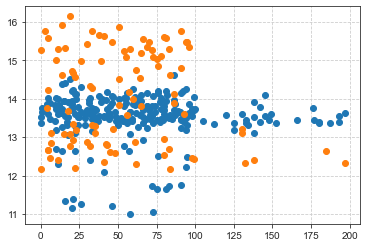

In [22]:
ion_list, logN_list, logNerr_list, b_list, berr_list, zcen_list, \
                zcen_sd_list, ray_id_list, model_list, vel_list, impact_list, ovi_label_list = pt.load_csv_data()

ovi_mask = (ion_list == 'OVI') & (model == 'P0') 
si_mask = (ion_list == 'SiIII') & (model == 'P0')
plt.scatter(ray_id_list[ovi_mask], logN_list[ovi_mask])
plt.scatter(ray_id_list[si_mask], logN_list[si_mask])

mask = (ion_list == 'OVI') | (ion_list == 'SiIII')
for i in range(200):
    mask = ((ion_list == 'OVI') | (ion_list == 'SiIII')) & (ray_id_list == i) & (model_list == 'P0')
    print(i, ion_list[mask], vel_list[mask], ovi_label_list[mask])

148 44


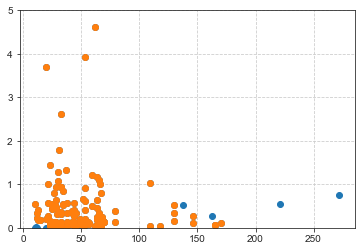

In [24]:
fn = '../../data/analyzed_spectra/combined_spectra.h5'

ray_id, model, ion, col, colerr, impact, total_col, ovi_label, flag = pt.load_data(['ray_id', 'model', 'ion', 'col', 'col_err', 'impact', 'total_col',\
                                'label','flag'], fn = fn)
mask = (ion == 'OVI') & (model == 'P0')
mask2 = mask & (flag == 1)
mask3 = mask & (colerr > 0.5)
plt.scatter(impact[mask], colerr[mask])
plt.scatter(impact[mask2], colerr[mask2])
#plt.scatter(impact[mask], total_col[mask])

#plt.ylim(12, 16)
#plt.xlim(0, 80)

plt.ylim(0, 5)
print(len(col[mask]), len(col[mask3]))




/anaconda3/lib/python3.5/site-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)
/anaconda3/lib/python3.5/site-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)
/anaconda3/lib/python3.5/site-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)
/anaconda3/lib/python3.5/site-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)
/anaconda3/lib/python3.5/site-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecatio

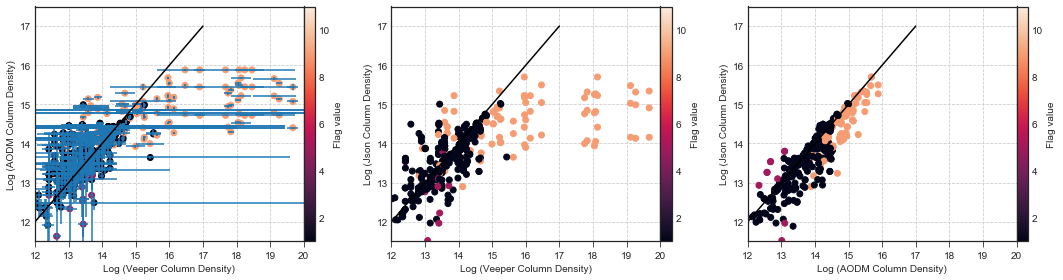

In [2]:
restwave, col, col_aodm, col_json, flag = pt.load_data(['restwave', 'col_veeper', 'col_aodm', 'col_json', 'flag'], use_filtered = False)
ion, model, impact = pt.load_data(['ion','model',  'impact'], use_filtered = False)
col_err, col_aodm_err, col_json_err, eqw_aodm, eqw_aodm_err, eqw_json, eqw_json_err = \
    pt.load_data(['col_err_veeper', 'col_err_aodm', 'col_err_json', 'eqw_aodm', 'eqw_err_aodm', 'eqw_json', 'eqw_err_json'], use_filtered = False)

#mask = (flag == 1) & (model == 'P0') & (ion == 'NIII') 
mask = (impact > 0)
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
#print(col_err[mask], restwave[mask])

fig, ax = plt.subplots(ncols = 3, figsize = (15, 4))
im = ax[0].scatter(col[mask], col_aodm[mask], c = flag[mask], vmin = 1, vmax = 11)
cbar = plt.colorbar(im, ax = ax[0], pad = 0)
ax[0].errorbar(col[mask], col_aodm[mask], xerr = col_err[mask], yerr = col_aodm_err[mask], linestyle = '')
cbar.set_label('Flag value')
ax[0].plot([12, 17], [12, 17], color ='black')
ax[0].set_xlim(12, 20)
ax[0].set_ylim(11.5, 17.5)
ax[0].set_xlabel('Log (Veeper Column Density)')
ax[0].set_ylabel('Log (AODM Column Density)')

im = ax[1].scatter(col[mask], col_json[mask], c = flag[mask], vmin = 1, vmax = 11)
#ax[1].errorbar(col[mask], col_json[mask], xerr = col_err[mask], yerr = col_json_err[mask], linestyle = '')
cbar = plt.colorbar(im, ax = ax[1], pad = 0)
cbar.set_label('Flag value')
ax[1].plot([12, 17], [12, 17], color ='black')
ax[1].set_xlim(12, 20)
ax[1].set_ylim(11.5, 17.5)
ax[1].set_xlabel('Log (Veeper Column Density)')
ax[1].set_ylabel('Log (Json Column Density)')


im = ax[2].scatter(col_aodm[mask], col_json[mask], c = flag[mask], vmin = 1, vmax = 11)
#ax[2].errorbar(col_aodm[mask], col_json[mask], xerr = col_aodm_err[mask], yerr = col_json_err[mask], linestyle = '')
cbar = plt.colorbar(im, ax = ax[2], pad = 0)
cbar.set_label('Flag value')
ax[2].plot([12, 17], [12, 17], color ='black')
ax[2].set_xlim(12, 20)
ax[2].set_ylim(11.5, 17.5)
ax[2].set_xlabel('Log (AODM Column Density)')
ax[2].set_ylabel('Log (Json Column Density)')

fig.tight_layout()
#plt.savefig('../../plots/compare_column_flags.png', dpi = 300)

['HI' 'HI' 'HI' ... 'NV' 'NV' 'NV']


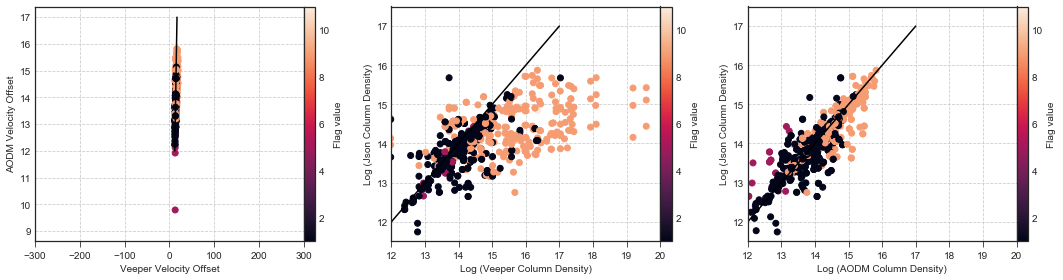

In [9]:
vel, vel_aodm = pt.load_data(['vel', 'vel_aodm'], use_filtered = False)

mask = (flag == 1) & (model == 'anisd') & (impact  == 30) & (ion == 'NIII') 
mask = (impact > 0)
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
print(ion[mask])

fig, ax = plt.subplots(ncols = 3, figsize = (15, 4))
im = ax[0].scatter(col[mask], col_aodm[mask], c = flag[mask], vmin = 1, vmax = 11)
cbar = plt.colorbar(im, ax = ax[0], pad = 0)
cbar.set_label('Flag value')
ax[0].plot([12, 17], [12, 17], color ='black')
ax[0].set_xlim(-300, 300)
#ax[0].set_ylim(11.5, 17.5)
ax[0].set_xlabel('Veeper Velocity Offset')
ax[0].set_ylabel('AODM Velocity Offset')

im = ax[1].scatter(col[mask], col_json[mask], c = flag[mask], vmin = 1, vmax = 11)
#ax[1].errorbar(col[mask], col_json[mask], xerr = col_err[mask], yerr = col_json_err[mask], linestyle = '')
cbar = plt.colorbar(im, ax = ax[1], pad = 0)
cbar.set_label('Flag value')
ax[1].plot([12, 17], [12, 17], color ='black')
ax[1].set_xlim(12, 20)
ax[1].set_ylim(11.5, 17.5)
ax[1].set_xlabel('Log (Veeper Column Density)')
ax[1].set_ylabel('Log (Json Column Density)')


im = ax[2].scatter(col_aodm[mask], col_json[mask], c = flag[mask], vmin = 1, vmax = 11)
#ax[2].errorbar(col_aodm[mask], col_json[mask], xerr = col_aodm_err[mask], yerr = col_json_err[mask], linestyle = '')
cbar = plt.colorbar(im, ax = ax[2], pad = 0)
cbar.set_label('Flag value')
ax[2].plot([12, 17], [12, 17], color ='black')
ax[2].set_xlim(12, 20)
ax[2].set_ylim(11.5, 17.5)
ax[2].set_xlabel('Log (AODM Column Density)')
ax[2].set_ylabel('Log (Json Column Density)')

fig.tight_layout()
#plt.savefig('../../plots/compare_column_flags.png', dpi = 300)